In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [2]:
df = pd.read_csv("pulsar.csv")

In [3]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [4]:
df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


<AxesSubplot:>

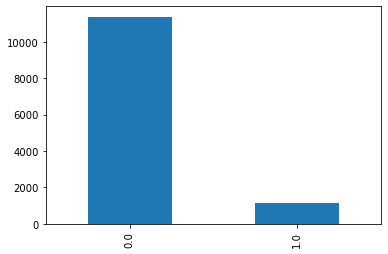

In [6]:
df['target_class'].value_counts().plot(kind = 'bar')

In [7]:
#Filling the null values with median
df[' Excess kurtosis of the integrated profile'].fillna(df[' Excess kurtosis of the integrated profile'].median() , inplace=True)
df[' Standard deviation of the DM-SNR curve'].fillna(df[' Standard deviation of the DM-SNR curve'].median() , inplace=True)
df[' Skewness of the DM-SNR curve'].fillna(df[' Skewness of the DM-SNR curve'].median(),inplace=True)


In [8]:
df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

Text(0.5, 1.0, 'Skewness of the DM-SNR curve')

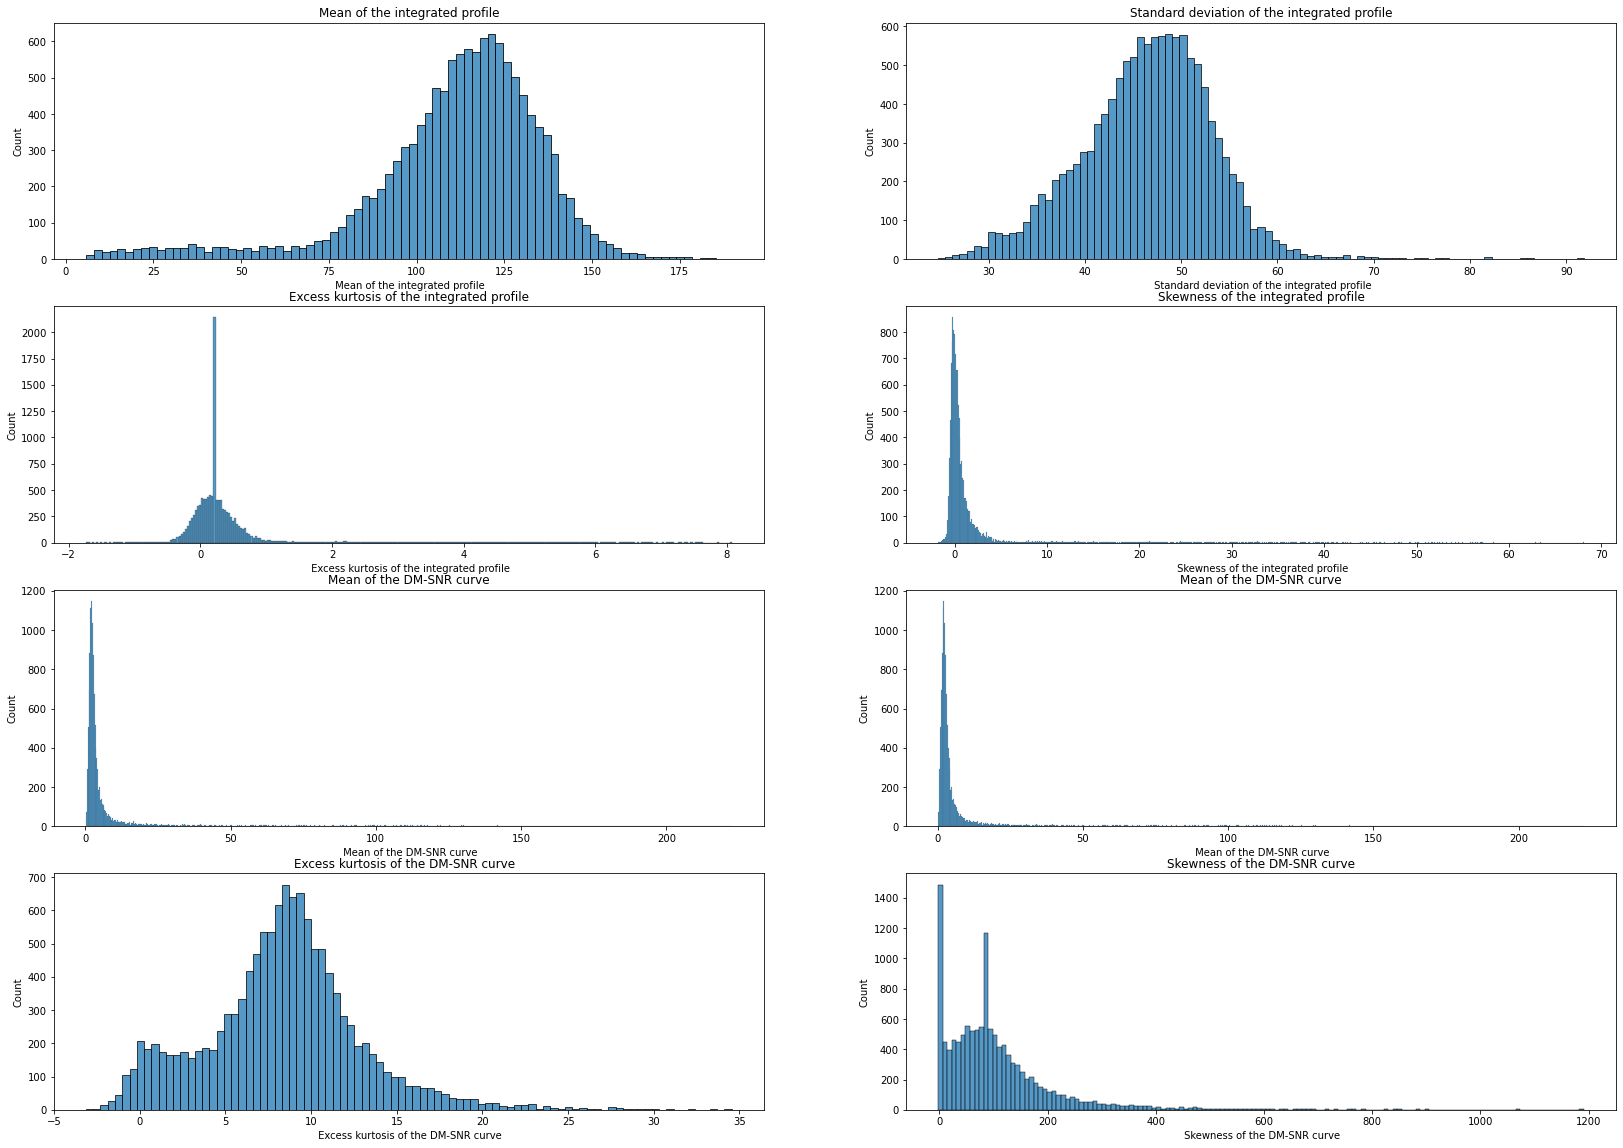

In [9]:
####checking for outliers
####drawing histograms for each attribute
plt.figure(figsize=(28,20))

plt.subplot(4,2,1)
sns.histplot(df[' Mean of the integrated profile'])
plt.title('Mean of the integrated profile')

plt.subplot(4,2,2)
sns.histplot(df[' Standard deviation of the integrated profile'])
plt.title('Standard deviation of the integrated profile')

plt.subplot(4,2,3)
sns.histplot(df[' Excess kurtosis of the integrated profile'])
plt.title('Excess kurtosis of the integrated profile')

plt.subplot(4,2,4)
sns.histplot(df[' Skewness of the integrated profile'])
plt.title('Skewness of the integrated profile')

plt.subplot(4,2,5)
sns.histplot(df[' Mean of the DM-SNR curve'])
plt.title('Mean of the DM-SNR curve')

plt.subplot(4,2,6)
sns.histplot(df[' Mean of the DM-SNR curve'])
plt.title('Mean of the DM-SNR curve')

plt.subplot(4,2,7)
sns.histplot(df[' Excess kurtosis of the DM-SNR curve'])
plt.title('Excess kurtosis of the DM-SNR curve  ')

plt.subplot(4,2,8)
sns.histplot(df[' Skewness of the DM-SNR curve'])
plt.title('Skewness of the DM-SNR curve')

In [10]:
##as we can see there are outliers in the data
##so we would have to choose a high value for c

In [11]:
##splitting the data
X = df.drop(['target_class'], axis=1)
y = df['target_class']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
##feature scaling
cols = X_train.columns

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test , columns = [cols])

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
from sklearn import svm
from sklearn.metrics import f1_score
###for c = 0.1
svc = svm.SVC(kernel ='linear', C = 0.1).fit(X_train, y_train)
y_pred=svc.predict(X_test)
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.855


In [18]:
##for c = 1
svc = svm.SVC(kernel ='linear', C = 1).fit(X_train, y_train)
y_pred=svc.predict(X_test)
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.858


In [19]:
##for c = 10
svc = svm.SVC(kernel ='linear', C = 10).fit(X_train, y_train)
y_pred=svc.predict(X_test)
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.861


In [20]:
##for c = 100
svc = svm.SVC(kernel ='linear', C = 100).fit(X_train, y_train)
y_pred=svc.predict(X_test)
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.861


In [21]:
##for c = 1000
svc = svm.SVC(kernel ='linear', C = 1000).fit(X_train, y_train)
y_pred=svc.predict(X_test)
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.861


In [23]:
##running the sigmoid kernel for c = 0.1
svc = svm.SVC(kernel ='sigmoid', C = 0.1).fit(X_train, y_train)
y_pred=svc.predict(X_test)
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.341


In [24]:
##running the sigmoid kernel for c = 1
svc = svm.SVC(kernel ='sigmoid', C = 1).fit(X_train, y_train)
y_pred=svc.predict(X_test)
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.337


In [25]:
##running the sigmoid kernel for c = 10
svc = svm.SVC(kernel ='sigmoid', C = 10).fit(X_train, y_train)
y_pred=svc.predict(X_test)
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.337


In [26]:
##running the sigmoid kernel for c = 100
svc = svm.SVC(kernel ='sigmoid', C = 100).fit(X_train, y_train)
y_pred=svc.predict(X_test)
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.337


In [27]:
##running the sigmoid kernel for c = 1000
svc = svm.SVC(kernel ='sigmoid', C = 1000).fit(X_train, y_train)
y_pred=svc.predict(X_test)
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.337


In [28]:
##running the rbf kernel for c = 0.1
svc = svm.SVC(kernel ='sigmoid', C = 0.1).fit(X_train, y_train)
y_pred=svc.predict(X_test)
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.341


In [29]:
##running the rbf kernel for c = 10
svc = svm.SVC(kernel ='sigmoid', C = 10).fit(X_train, y_train)
y_pred=svc.predict(X_test)
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.337


In [30]:
##running the rbf kernel for c = 1
svc = svm.SVC(kernel ='sigmoid', C = 1).fit(X_train, y_train)
y_pred=svc.predict(X_test)
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.337


In [31]:
##running the rbf kernel for c = 1000
svc = svm.SVC(kernel ='sigmoid', C = 1000).fit(X_train, y_train)
y_pred=svc.predict(X_test)
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.337
